In [1]:
import imagesize
import numpy as np
from numpy.random import default_rng
from scipy.stats import multivariate_normal
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

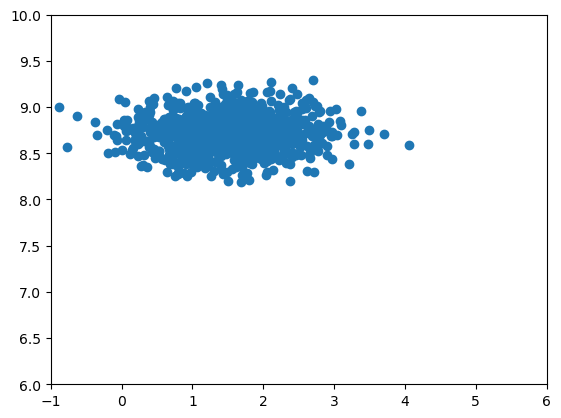

Matrice di covarianza di x0:
[[0.50663679 0.50663679]
 [0.50663679 0.50663679]]


Matrice di covarianza dei dati:
[[0.50663679 0.00428065]
 [0.00428065 0.03676285]]


In [2]:
# Creiamo un data set di punti bidimensionali in cui ogni
# coordinata è distribuita secondo una gaussiana

rg  = default_rng()

mu, sigma = np.array([1.5, 8.7]), np.array([0.7, 0.2])

x0 = rg.normal(mu[0], sigma[0], 1000)
x1 = rg.normal(mu[1], sigma[1], 1000)

plt.scatter(x0, x1)
plt.xlim((-1, 6))
plt.ylim((6,10))

plt.show()

cov = np.cov(np.array([x0,x1]))

print(f'Matrice di covarianza di x0:\n{np.cov(np.array([x0,x0]))}')
print(f'\n\nMatrice di covarianza dei dati:\n{cov}')


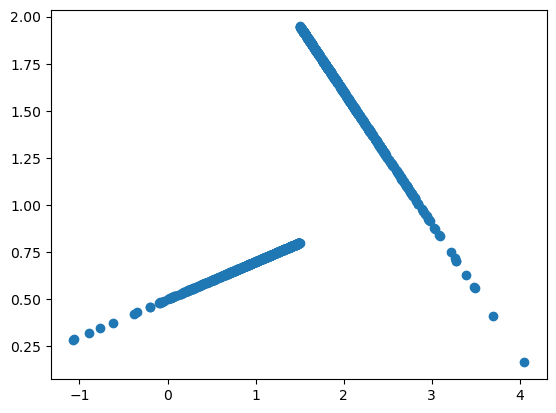



Matrice di covarianza dei dati:
[[0.50663679 0.20519006]
 [0.20519006 0.24406415]]


In [3]:
# Effettuaimo una trasformazione sui dati in modo tale da ottenere una correlazione
# positiva

x1[x0 > mu[0]] = 3.0 - 0.7 * x0[x0 > mu[0]]
x1[x0 <= mu[0]] = 0.5 + 0.2 * x0[x0 <= mu[0]]

# x1 = 3.0 - 0.7 * x0

plt.scatter(x0, x1)
plt.show()

cov = np.cov(np.array([x0,x1]))

print(f'\n\nMatrice di covarianza dei dati:\n{cov}')


In [5]:
# Creiamo una gaussiana bivariata che abbia la matrice 'cov'
# come matrice di covarianza.
# Dobbiamo modificare i valori di mu e sigma relativi alla distribuzione di x1
# per rispecchiare la matrice stessa

mu[1] = np.average(x1)
sigma[1] = np.sqrt(cov[1,1])

# Spazi lineari delle due coordinate da 500 punti ciascuno
x = np.linspace(mu[0] - 4*sigma[0], mu[0] + 4*sigma[0], 500)
y = np.linspace(mu[1] - 4*sigma[1], mu[1] + 4*sigma[1], 500)

# matrici 500x500 che contengono ciascuna la ripetizione di una coordinata
# al variare dell'altra 
X, Y = np.meshgrid(x, y)

# Matrice (500,500,2) che contiene tutte le possibili coppie di coordinate
pos = np.dstack((X,Y))

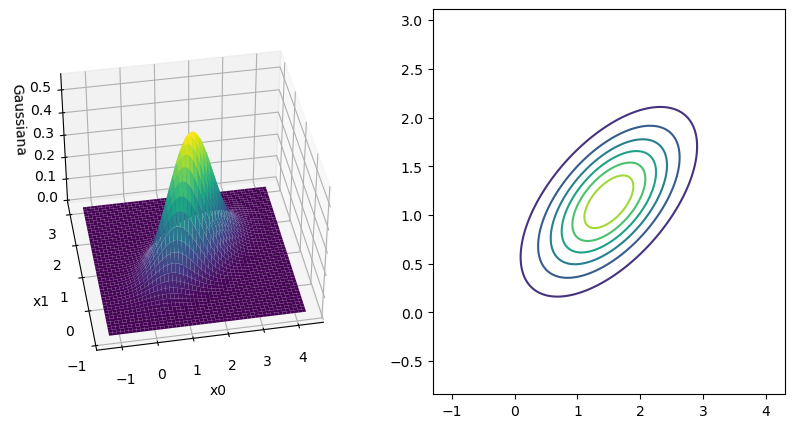

In [9]:
# Generiamo la gaussiana bivariata con la nuova media e matrice di covarianza
rv = multivariate_normal(mu, cov)

# Creiamo una figura rettangolare 10x5
fig = plt.figure(figsize=(10,5))

# Creiamo il primo plot 3d in una struttura orizzontale 1 riga x 2 colonne
ax = fig.add_subplot(121, projection='3d')

# plottiamo la superficie: X e Y fanno da coordinate e pos viene udato per il calcolo
# esplicito della gaussiana bivariata
ax.plot_surface(X, Y, rv.pdf(pos), cmap='viridis')

ax.view_init(elev=40, azim=-100)

ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('Gaussiana')
#ax.tick_params(axis='z', which='both',\
#                bottom=False, top=False, right=False, left=False,\
#                labelbottom=False, labelleft=False)

ax2 = fig.add_subplot(122)
ax2 = plt.contour(X, Y, rv.pdf(pos))

plt.show()

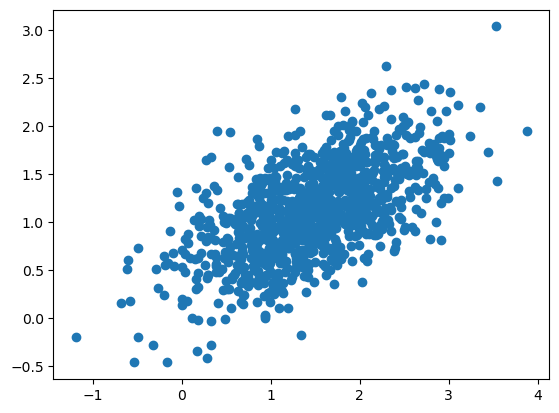

In [22]:
# Generiamo i dati campionati dalla gaussiana bivariata

n = 1000 # numero dei campioni utilizzati

data = rg.multivariate_normal(mu, cov, n)

plt.scatter(data[:,0], data[:,1])

plt.show()

In [23]:
# Calcoliamo la SVD che ci fornisce cov = Q*S*PT
# a partire dai dati a cui abbiamo sottratto la media

# Le righe di PT saranno gli autovettori della matrice cov
# e quindi rappresentano le componenti principali

# le varianze si otterrano a partire dai valori singolari 
# di S calcolando S*ST/(n-1)

Q, S, Pt = np.linalg.svd(data - mu, full_matrices=True)

In [24]:
Var = S**2/(n - 1)

print(f'Valori singolari: {S}\nComponenti principali: {Pt[0], Pt[1]}\nVarianze: {Var}')

Valori singolari: [25.50667458 11.18524989]
Componenti principali: (array([-0.88057055, -0.47391508]), array([-0.47391508,  0.88057055]))
Varianze: [0.65124169 0.12523505]


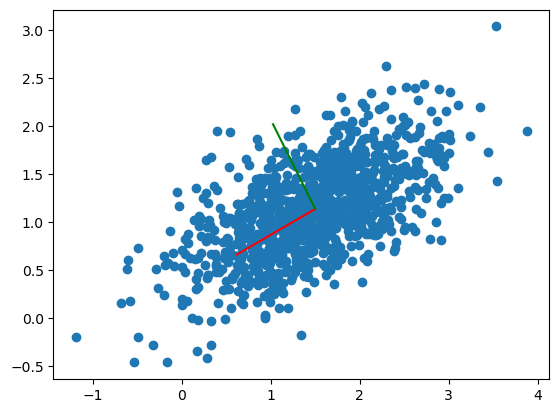

In [25]:
# Creiamo il plot dei punti con l'aggiunta delle componenti principali

# Ri-sommiamo la media alle componenti principali

pc1 = Pt[0] + mu
pc2 = Pt[1] + mu

plt.scatter(data[:,0], data[:,1])

plt.plot([mu[0],pc1[0]],[mu[1],pc1[1]],'r-')
plt.plot([mu[0],pc2[0]],[mu[1],pc2[1]],'g-')

plt.show()


In [29]:
pca = PCA(n_components=2, svd_solver='full')

pca.fit(data)

print(f'Valori singolari: {pca.singular_values_}\nComponenti principali: {pca.components_[0], pca.components_[1]}\nVarianze: {pca.explained_variance_}')

Valori singolari: [25.4811818  11.18435139]
Componenti principali: (array([-0.88042456, -0.47418624]), array([-0.47418624,  0.88042456]))
Varianze: [0.64994057 0.12521493]


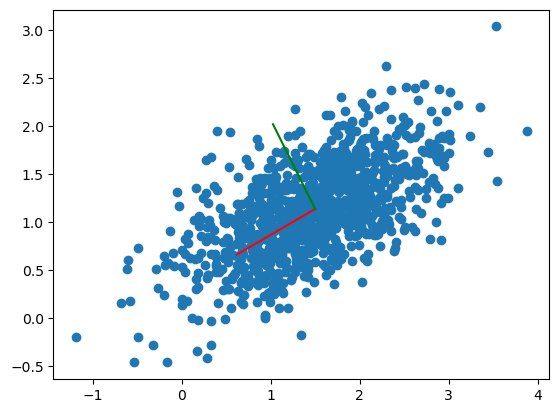

In [30]:
# Creiamo il plot dei punti con l'aggiunta delle componenti principali

# Ri-sommiamo la media alle componenti principali

pc1 = pca.components_[0] + mu
pc2 = pca.components_[1] + mu

plt.scatter(data[:,0], data[:,1])

plt.plot([mu[0],pc1[0]],[mu[1],pc1[1]],'r-')
plt.plot([mu[0],pc2[0]],[mu[1],pc2[1]],'g-')

plt.show()


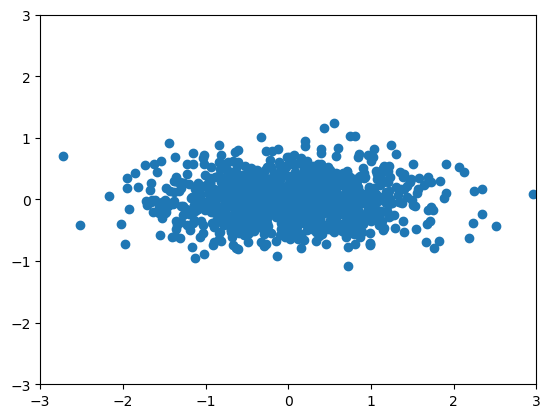

In [32]:
# Trasformiamo i dati e plottiamoli

data_new = pca.transform(data)

plt.scatter(data_new[:,0], data_new[:,1])

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()
